In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick
import numpy as np 
import seaborn as sns 

In [3]:
dat = pd.read_csv("used_car_dataset_cleaned.csv")

In [4]:
dat.head()

,brand,fuel_type,model_date,vehicle_transmission,Car_name,Year,Location,mileage_from_odometer_km,vehicle_engine_cc,price_usd
0,MG,Petrol,2021.0,Automatic,HS,2021,Lahore,6000.0,1490.0,23137.48
1,Toyota,Petrol,2012.0,Manual,Aygo,2012,Islamabad,68000.0,1000.0,5762.21
2,Honda,Petrol,2015.0,Automatic,City,2015,Lahore,150000.0,1300.0,9042.23
3,KIA,Petrol,2022.0,Automatic,Sorento,2022,Sialkot,18000.0,3500.0,31913.76
4,Toyota,Petrol,2015.0,Automatic,Corolla,2015,Rawalpindi,110000.0,1300.0,11879.01


In [5]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54115 entries, 0 to 54114
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   brand                     54115 non-null  object 
 1   fuel_type                 54115 non-null  object 
 2   model_date                54115 non-null  float64
 3   vehicle_transmission      54115 non-null  object 
 4   Car_name                  54115 non-null  object 
 5   Year                      54115 non-null  int64  
 6   Location                  54115 non-null  object 
 7   mileage_from_odometer_km  54115 non-null  float64
 8   vehicle_engine_cc         54115 non-null  float64
 9   price_usd                 54115 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 4.1+ MB


### EDA
  
  * make another dataset on description for the top 5-10 car brands in each year price time

In [6]:
dat.Year.unique()

array([2021, 2012, 2015, 2022, 2004, 2008, 2018, 2003, 2010, 2019, 2020,
       2013, 2007, 1999, 2016, 2014, 1997, 2017, 2001, 2011, 1985, 1987,
       1984, 2000, 2006, 1982, 2005, 1998, 1988, 1995, 2009, 1996, 1994,
       1991, 1989, 1993, 2002, 1992, 1986, 1967, 1981, 1969, 1990, 1983,
       1960, 1980, 2023, 1979, 1974, 1965, 1968, 1963, 1976, 1975, 1961,
       1978, 1972, 1970, 1973, 1951, 1966, 1962, 1971, 1952, 1977, 1964,
       1942], dtype=int64)

Text(0.5, 1.0, 'top 5 car brands on website being sold')

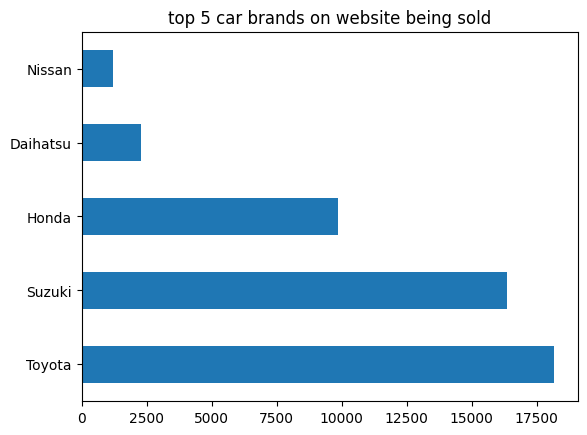

In [7]:
#top 5-10 car brands that have their cars on the website 
dat["brand"].value_counts().head(5).plot(kind="barh")
plt.title("top 5 car brands on website being sold")

In [8]:
#create new dataset with top 5 car brands 
dat1 = pd.DataFrame({})
idx = dat["brand"].value_counts().head(5).index
dat1 = dat[dat["brand"].isin(idx)]

In [9]:
dat1.head()

,brand,fuel_type,model_date,vehicle_transmission,Car_name,Year,Location,mileage_from_odometer_km,vehicle_engine_cc,price_usd
1,Toyota,Petrol,2012.0,Manual,Aygo,2012,Islamabad,68000.0,1000.0,5762.21
2,Honda,Petrol,2015.0,Automatic,City,2015,Lahore,150000.0,1300.0,9042.23
4,Toyota,Petrol,2015.0,Automatic,Corolla,2015,Rawalpindi,110000.0,1300.0,11879.01
5,Nissan,Petrol,2004.0,Automatic,March,2004,Karachi,100000.0,1000.0,3723.27
6,Honda,Petrol,2021.0,Automatic,Civic,2021,Islamabad,20500.0,1800.0,22250.98


In [10]:
#save df1
dat1.to_csv("used_car_dataset_cleaned_top_5.csv", index=0)

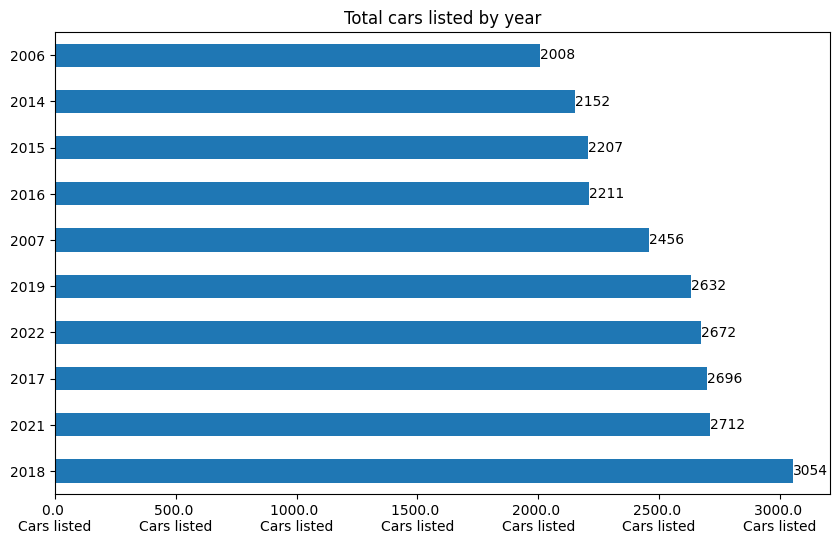

In [12]:
plt.figure(figsize=(10,6))
d = dat1["Year"].value_counts().sort_values(ascending=False)[:10].plot(kind="barh", title="Total cars listed by year")

for i in d.containers:
  d.bar_label(i)

plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: "{} \nCars listed".format(x)))

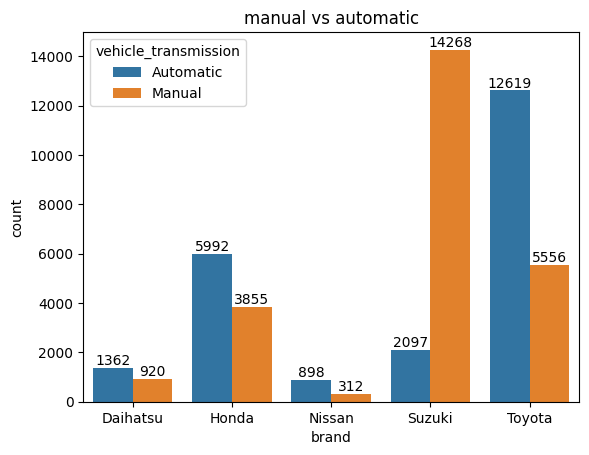

In [13]:
#what brand has the most manual/automatic - 
b = dat1.groupby("brand")[["vehicle_transmission"]].value_counts().reset_index().rename(columns={0:"count"})
b = sns.barplot(data=b, x="brand", y="count", hue="vehicle_transmission")
plt.title("manual vs automatic")
for i in b.containers:
    b.bar_label(i)


In [17]:
#most expensive car name --
b = dat1.sort_values(by="price_usd", ascending=False).head()
b.head(1).price_usd

24860    400695.01
Name: price_usd, dtype: float64

1. location where most of the cars are sold
2. highest cc and what is the lowest 
3. mileage effect price 

In [19]:
dat1.head()

,brand,fuel_type,model_date,vehicle_transmission,Car_name,Year,Location,mileage_from_odometer_km,vehicle_engine_cc,price_usd
1,Toyota,Petrol,2012.0,Manual,Aygo,2012,Islamabad,68000.0,1000.0,5762.21
2,Honda,Petrol,2015.0,Automatic,City,2015,Lahore,150000.0,1300.0,9042.23
4,Toyota,Petrol,2015.0,Automatic,Corolla,2015,Rawalpindi,110000.0,1300.0,11879.01
5,Nissan,Petrol,2004.0,Automatic,March,2004,Karachi,100000.0,1000.0,3723.27
6,Honda,Petrol,2021.0,Automatic,Civic,2021,Islamabad,20500.0,1800.0,22250.98
